In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random

# Preprocess

In [2]:
directory = './csvFiles'

In [3]:
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

In [ ]:
# 파일 목록을 랜덤하게 섞습니다.
random.seed(42)  # 재현 가능한 결과를 위해 시드 설정
random.shuffle(csv_files)

In [4]:
df_list = []
for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    df = df.iloc[300:-100]
    df = df.applymap(lambda x: float(f"{x:.2f}") if isinstance(x, (int, float)) else x)
    df_list.append(df)

C:\Users\admin\AppData\Local\Temp\ipykernel_25988\914781413.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: float(f"{x:.2f}") if isinstance(x, (int, float)) else x)
C:\Users\admin\AppData\Local\Temp\ipykernel_25988\914781413.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: float(f"{x:.2f}") if isinstance(x, (int, float)) else x)
C:\Users\admin\AppData\Local\Temp\ipykernel_25988\914781413.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: float(f"{x:.2f}") if isinstance(x, (int, float)) else x)
C:\Users\admin\AppData\Local\Temp\ipykernel_25988\914781413.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: float(f"{x:.2f}") if isinstance(x, (int, float)) else x)
C:\Users\admin\AppData\Local\Temp\ipykernel_25988\914781413.py:5

In [5]:
combined_df = pd.concat(df_list, ignore_index=True)

In [6]:
combined_df

,Frame,Time,m_avg_PelvisPosX,m_avg_PelvisPosY,m_avg_PelvisPosZ,m_avg_PelvisRotX,m_avg_PelvisRotY,m_avg_PelvisRotZ,m_avg_L_HipPosX,m_avg_L_HipPosY,...,m_avg_R_ElbowRotX,m_avg_R_ElbowRotY,m_avg_R_ElbowRotZ,m_avg_R_WristPosX,m_avg_R_WristPosY,m_avg_R_WristPosZ,m_avg_R_WristRotX,m_avg_R_WristRotY,m_avg_R_WristRotZ,Unnamed: 128
0,281.0,3.21,0.34,0.28,0.54,0.00,180.00,0.00,0.4,0.20,...,0.00,180.00,0.00,-0.39,0.76,0.62,0.00,180.00,0.00,NaN
1,282.0,3.22,0.34,0.28,0.54,0.00,180.00,0.00,0.4,0.20,...,0.00,180.00,0.00,-0.39,0.76,0.62,0.00,180.00,0.00,NaN
2,283.0,3.23,0.34,0.28,0.54,0.00,180.00,0.00,0.4,0.20,...,0.00,180.00,0.00,-0.39,0.76,0.62,0.00,180.00,0.00,NaN
3,284.0,3.24,0.34,0.28,0.54,0.00,180.00,0.00,0.4,0.20,...,0.00,180.00,0.00,-0.39,0.76,0.62,0.00,180.00,0.00,NaN
4,285.0,3.25,0.34,0.28,0.54,0.00,180.00,0.00,0.4,0.20,...,0.00,180.00,0.00,-0.39,0.76,0.62,0.00,180.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282506,6609.0,73.51,0.06,0.48,1.14,358.24,358.39,0.71,0.0,0.39,...,7.21,346.10,349.96,0.76,0.90,1.21,357.14,3.21,347.35,NaN
1282507,6610.0,73.53,0.06,0.48,1.14,358.24,358.39,0.71,0.0,0.39,...,7.22,346.23,349.95,0.76,0.90,1.21,356.62,3.42,347.09,NaN
1282508,6611.0,73.54,0.06,0.48,1.14,358.56,359.12,0.70,0.0,0.39,...,7.23,346.34,349.94,0.76,0.90,1.21,355.43,3.78,346.54,NaN
1282509,6612.0,73.55,0.06,0.48,1.14,358.56,359.12,0.70,0.0,0.39,...,7.24,346.51,349.97,0.76,0.90,1.20,354.11,4.22,345.88,NaN


In [7]:
len(combined_df)

1282511

In [8]:
rotation_columns = [col for col in combined_df.columns if 'Rot' in col]
rotation_df = combined_df[rotation_columns]

In [9]:
# -180~180 사이로 정규화
normalize_angle = lambda x: (x - 360) if x > 180 else (x + 360) if x < -180 else x
rotation_df = rotation_df.apply(lambda col: col.apply(normalize_angle))

In [10]:
rotation_df.head()

,m_avg_PelvisRotX,m_avg_PelvisRotY,m_avg_PelvisRotZ,m_avg_L_HipRotX,m_avg_L_HipRotY,m_avg_L_HipRotZ,m_avg_L_KneeRotX,m_avg_L_KneeRotY,m_avg_L_KneeRotZ,m_avg_L_AnkleRotX,...,m_avg_R_CollarRotZ,m_avg_R_ShoulderRotX,m_avg_R_ShoulderRotY,m_avg_R_ShoulderRotZ,m_avg_R_ElbowRotX,m_avg_R_ElbowRotY,m_avg_R_ElbowRotZ,m_avg_R_WristRotX,m_avg_R_WristRotY,m_avg_R_WristRotZ
0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0
1,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0
2,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0
3,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0
4,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0


In [11]:
# 이전 프레임과의 차이를 계산하여 변화량 DataFrame을 생성
rotation_change_df = rotation_df.diff().abs()

In [12]:
# 평균 변화량을 계산하는 함수
def calculate_average_change(rotation_df):
    rotation_change_df = rotation_df.diff().abs()
    # 첫 번째 행의 NaN 값을 0으로 채우기 (또는 다른 합리적인 값으로 채울 수 있음)
    rotation_change_df.iloc[0] = rotation_change_df.iloc[0].fillna(0)
    # 모든 joint의 변화량에 대한 평균을 계산
    average_change = rotation_change_df.mean(axis=1)
    return average_change

In [13]:
# 평균 변화량을 기준으로 데이터를 1, 2, 3단계로 나누는 함수
def categorize_average_change(average_change, thresholds):
    # 변화량에 따라 범주화
    categories = np.digitize(average_change, thresholds)
    return categories

In [14]:
# DataFrame에 변화량 범주를 추가하는 함수
def add_change_category_to_df(rotation_df, thresholds):
    average_change = calculate_average_change(rotation_df)
    change_categories = categorize_average_change(average_change, thresholds)
    rotation_df['Rot_diff_category'] = change_categories
    return rotation_df

In [15]:
# 임계값 설정 (예: [5, 10])
thresholds = [5, 10]
combined_df = add_change_category_to_df(rotation_df, thresholds)

In [16]:
# -180 ~ 180 범위를 벗어나는 값이 있는지 확인
num_values_out_of_range = (combined_df > 180).sum().sum() + (combined_df < -180).sum().sum()

# 결과 확인
if num_values_out_of_range > 0:
    print(f"범위를 벗어나는 값의 수: {num_values_out_of_range}")
else:
    print("범위를 벗어나는 값이 없습니다.")

범위를 벗어나는 값이 없습니다.


In [17]:
category_counts = combined_df['Rot_diff_category'].value_counts()
print(category_counts)

Rot_diff_category
0    1191073
1      60982
2      30456
Name: count, dtype: int64


In [18]:
combined_df.head()

,m_avg_PelvisRotX,m_avg_PelvisRotY,m_avg_PelvisRotZ,m_avg_L_HipRotX,m_avg_L_HipRotY,m_avg_L_HipRotZ,m_avg_L_KneeRotX,m_avg_L_KneeRotY,m_avg_L_KneeRotZ,m_avg_L_AnkleRotX,...,m_avg_R_ShoulderRotX,m_avg_R_ShoulderRotY,m_avg_R_ShoulderRotZ,m_avg_R_ElbowRotX,m_avg_R_ElbowRotY,m_avg_R_ElbowRotZ,m_avg_R_WristRotX,m_avg_R_WristRotY,m_avg_R_WristRotZ,Rot_diff_category
0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0
1,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0
2,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0
3,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0
4,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0


In [19]:
combined_df.to_csv('./combined_df.csv', index=False)

# Transformer Learning

In [20]:
# 변환된 데이터를 DataFrame으로 변환
combined_df = pd.DataFrame(combined_df, columns=combined_df.columns)

In [21]:
train = combined_df.iloc[:897757]
test = combined_df.iloc[897757:]

In [22]:
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_val = train_test_split(train, test_size=0.2, random_state=42, shuffle=False)

In [24]:
batch_size = 128
n_input = 30  # Sequence length
n_features = 64  # Number of features
output_units = (21 * 3) + 1  # Output shape
head_size = 256  # Size of attention head
num_heads = 8  # Number of attention heads
ff_dim = 512  # Hidden layer size in feed forward network inside transformer
num_blocks = 4  # Number of transformer blocks
mlp_units = [512, 256, 128]  # Size of the dense layers of the final classifier
dropout_rate = 0.3 

# TimeseriesGenerator 생성
train_generator = TimeseriesGenerator(X_train.values, X_train.values, length=n_input, batch_size=batch_size)
val_generator = TimeseriesGenerator(X_val.values, X_val.values, length=n_input, batch_size=batch_size)

In [25]:
train_generator.length

30

In [26]:
X, y = train_generator[0]

In [27]:
X.shape

(128, 30, 64)

In [28]:
y.shape

(128, 64)

In [29]:
y

array([[   0.  ,  180.  ,    0.  , ...,  180.  ,    0.  ,    0.  ],
       [   0.  ,  180.  ,    0.  , ...,  180.  ,    0.  ,    0.  ],
       [   0.  ,  180.  ,    0.  , ...,  180.  ,    0.  ,    0.  ],
       ...,
       [  30.89, -179.93,   -3.13, ...,  -10.73, -178.35,    0.  ],
       [  30.89, -179.93,   -3.13, ...,  -10.55, -178.62,    0.  ],
       [  30.79, -178.88,   -2.25, ...,  -10.52, -178.78,    0.  ]])

In [30]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from keras.initializers import HeNormal
from keras import layers
from keras.optimizers import Adam
from keras.losses import Loss

In [31]:
model = Sequential()

def transformer_block(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Multi-Head Attention
    attention_out = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    attention_out = layers.Dropout(dropout)(attention_out)
    attention_out = layers.LayerNormalization(epsilon=1e-6)(inputs + attention_out)

    # Feed Forward
    ff_out = layers.Dense(ff_dim, activation="relu", kernel_initializer=HeNormal())(attention_out)
    ff_out = layers.Dropout(dropout)(ff_out)
    ff_out = layers.Dense(inputs.shape[-1])(ff_out)
    ff_out = layers.LayerNormalization(epsilon=1e-6)(attention_out + ff_out)
    return ff_out

def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_blocks, output_units, dropout=0, mlp_units=[]):
    inputs = layers.Input(shape=input_shape)
    x = inputs

    for _ in range(num_blocks):
        x = transformer_block(x, head_size, num_heads, ff_dim, dropout)

    for units in mlp_units:
        x = layers.Dense(units, activation="relu")(x)
        x = layers.Dropout(dropout)(x)
        x = layers.LayerNormalization()(x)

    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(output_units, activation="linear")(x)  # Sigmoid activation for output layer
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Building the model
model = build_transformer_model(
    input_shape=(n_input, n_features),
    head_size=head_size,
    num_heads=num_heads,
    ff_dim=ff_dim,
    num_blocks=num_blocks,
    dropout=dropout_rate,
    mlp_units=mlp_units,
    output_units=output_units
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)  # patience를 7에서 15로 증가
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.00001)  # patience를 4에서 7로 증가, min_lr를 더 낮춤
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
csv_logger = CSVLogger('training_log.csv', append=True)

In [32]:
class CustomLoss(Loss):
    def __init__(self, weighted_columns_indices, weight_for_weighted_columns, weights_for_rot_diff_category, **kwargs):
        super().__init__(**kwargs)
        self.weighted_columns_indices = tf.constant(weighted_columns_indices, dtype=tf.int32)
        self.weight_for_weighted_columns = weight_for_weighted_columns
        self.weights_for_rot_diff_category = tf.constant(weights_for_rot_diff_category, dtype=tf.float32)

    def call(self, y_true, y_pred):
        # y_pred의 마지막 feature를 rot_diff_category로 분리
        y_pred_values = y_pred[:, :-1]
        rot_diff_pred = y_pred[:, -1]

        # 런타임에 형태 확인
        # tf.print("y_true shape:", tf.shape(y_true))
        # tf.print("y_pred_values shape:", tf.shape(y_pred_values))

        # MSE 계산
        mse = tf.reduce_mean(tf.square(y_true[:, :-1] - y_pred_values), axis=-1)

        # 특정 joint rotation에 대한 가중치 적용
        weighted_mse = tf.gather(y_pred_values, self.weighted_columns_indices, axis=1)
        weighted_mse = tf.square(weighted_mse) * self.weight_for_weighted_columns
        mse += tf.reduce_mean(weighted_mse, axis=-1)

        # rot_diff_category에 따른 가중치 적용
        for category in range(len(self.weights_for_rot_diff_category)):
            category_mask = tf.cast(tf.equal(rot_diff_pred, category), tf.float32)
            category_mask = tf.expand_dims(category_mask, -1)  
            weighted_mse = tf.square(y_true[:, :-1] - y_pred_values) * category_mask
            mse += self.weights_for_rot_diff_category[category] * tf.reduce_mean(weighted_mse, axis=-1)

        return mse

# 가중치를 적용할 열 인덱스와 가중치 값
weighted_columns_indices = [42, 43, 44, 48, 49, 50, 60, 61, 62]  # 예시 인덱스
weight_for_weighted_columns = 2.0
weights_for_rot_diff_category = [1.0, 1.5, 2.0]  # 1단계, 2단계, 3단계에 대한 가중치

# CustomLoss 인스턴스 생성
custom_loss_instance = CustomLoss(
    weighted_columns_indices=weighted_columns_indices,
    weight_for_weighted_columns=weight_for_weighted_columns,
    weights_for_rot_diff_category=weights_for_rot_diff_category
)

In [33]:
# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001, decay=1e-6), loss=custom_loss_instance)
# model.compile(optimizer="adam", loss="mean_squared_error")

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30, 64)]     0           []                               
                                                                                                  
 multi_head_attention (MultiHea  (None, 30, 64)      530496      ['input_1[0][0]',                
 dAttention)                                                      'input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 30, 64)       0           ['multi_head_attention[0][0]']   
                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 30, 64)      0           ['input_1[0][0]',            

In [35]:
# 사용 가능한 GPU 목록을 출력합니다.
print("Available GPUs:", tf.config.experimental.list_physical_devices('GPU'))

# 현재 장치를 출력합니다.
print("Current device:", tf.test.gpu_device_name())

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Current device: /device:GPU:0


In [36]:
model.fit(
    train_generator, 
    epochs=50, 
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr, model_checkpoint, csv_logger]
    # callbacks=[reduce_lr, model_checkpoint, csv_logger]
    )

Epoch 1/50
5611/5611 [==============================] - 195s 34ms/step - loss: 5691.6318 - val_loss: 1704.4625 - lr: 1.0000e-04
Epoch 2/50
5611/5611 [==============================] - 192s 34ms/step - loss: 4660.6050 - val_loss: 1506.1758 - lr: 1.0000e-04
Epoch 3/50
5611/5611 [==============================] - 191s 34ms/step - loss: 4156.2295 - val_loss: 1439.0974 - lr: 1.0000e-04
Epoch 4/50
5611/5611 [==============================] - 202s 36ms/step - loss: 3912.5056 - val_loss: 1351.5619 - lr: 1.0000e-04
Epoch 5/50
5611/5611 [==============================] - 199s 35ms/step - loss: 3736.6506 - val_loss: 1360.5110 - lr: 1.0000e-04
Epoch 6/50
5611/5611 [==============================] - 191s 34ms/step - loss: 3584.1318 - val_loss: 1315.6389 - lr: 1.0000e-04
Epoch 7/50
5611/5611 [==============================] - 192s 34ms/step - loss: 3450.4883 - val_loss: 1343.3561 - lr: 1.0000e-04
Epoch 8/50
5611/5611 [==============================] - 191s 34ms/step - loss: 3326.0273 - val_loss: 126

In [37]:
model.save('final_model_Transformer.h5')

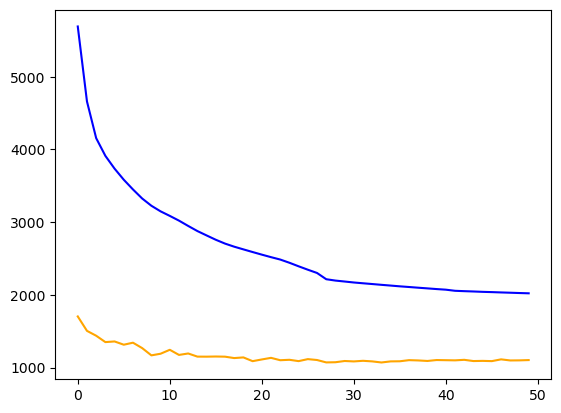

In [38]:
myloss = model.history.history['loss']
myval_loss = model.history.history['val_loss']
plt.plot(range(len(myloss)),myloss, label='Training Loss', color='blue')
plt.plot(range(len(myval_loss)), myval_loss, label='Validation Loss', color = 'orange')


# Test with real data

In [119]:
test_df = pd.read_csv('./B01_TransformData_FinalAvatar_20230922_171230.csv').iloc[300:-100]

In [120]:
test_df.head()

,Frame,Time,m_avg_PelvisPosX,m_avg_PelvisPosY,m_avg_PelvisPosZ,m_avg_PelvisRotX,m_avg_PelvisRotY,m_avg_PelvisRotZ,m_avg_L_HipPosX,m_avg_L_HipPosY,...,m_avg_R_ElbowRotX,m_avg_R_ElbowRotY,m_avg_R_ElbowRotZ,m_avg_R_WristPosX,m_avg_R_WristPosY,m_avg_R_WristPosZ,m_avg_R_WristRotX,m_avg_R_WristRotY,m_avg_R_WristRotZ,Unnamed: 128
280,281,3.294551,0.163016,0.314659,1.710794,359.5202,356.6692,0.294904,0.107622,0.234367,...,7.194553,9.402476,310.8916,0.686491,0.386070,1.544025,1.171339,338.1900,324.1107,NaN
281,282,3.305790,0.163016,0.314659,1.710794,359.5202,356.6692,0.294904,0.107622,0.234367,...,6.706309,8.927062,309.3292,0.677366,0.376311,1.550525,0.682866,337.0667,322.3369,NaN
282,283,3.316313,0.163470,0.314176,1.709881,359.5370,356.6327,0.269148,0.108054,0.233914,...,6.218950,8.483309,307.7678,0.669111,0.363508,1.551836,0.176055,335.8964,320.6281,NaN
283,284,3.327757,0.163470,0.314176,1.709881,359.5370,356.6327,0.269148,0.108054,0.233914,...,5.701145,8.032418,306.2205,0.659482,0.354410,1.558534,359.852700,334.4614,319.1403,NaN
284,285,3.338641,0.163470,0.314176,1.709881,359.5370,356.6327,0.269148,0.108054,0.233914,...,5.132072,7.533837,304.6148,0.649262,0.345275,1.565930,359.508200,332.9257,318.0372,NaN


In [121]:
test_rotation_columns = [col for col in test_df.columns if 'Rot' in col]
test_rotation_df = test_df[test_rotation_columns]

In [122]:
test_rotation_df

,m_avg_PelvisRotX,m_avg_PelvisRotY,m_avg_PelvisRotZ,m_avg_L_HipRotX,m_avg_L_HipRotY,m_avg_L_HipRotZ,m_avg_L_KneeRotX,m_avg_L_KneeRotY,m_avg_L_KneeRotZ,m_avg_L_AnkleRotX,...,m_avg_R_CollarRotZ,m_avg_R_ShoulderRotX,m_avg_R_ShoulderRotY,m_avg_R_ShoulderRotZ,m_avg_R_ElbowRotX,m_avg_R_ElbowRotY,m_avg_R_ElbowRotZ,m_avg_R_WristRotX,m_avg_R_WristRotY,m_avg_R_WristRotZ
280,359.52020,356.6692,0.294904,1.516567,0.428363,0.640516,356.1847,0.669316,359.864400,14.94714,...,353.6632,3.288348,5.412863,315.111500,7.194553,9.402476,310.891600,1.171339,338.1900,324.11070
281,359.52020,356.6692,0.294904,1.516567,0.428363,0.640516,356.1847,0.669316,359.864400,14.94714,...,353.6632,2.694828,5.047416,313.595700,6.706309,8.927062,309.329200,0.682866,337.0667,322.33690
282,359.53700,356.6327,0.269148,1.754540,0.007881,0.571299,355.8433,0.286560,359.710200,16.21369,...,352.4646,2.105070,4.715876,312.078900,6.218950,8.483309,307.767800,0.176055,335.8964,320.62810
283,359.53700,356.6327,0.269148,1.754540,0.007881,0.571299,355.8433,0.286560,359.710200,16.21369,...,352.4646,1.488734,4.378508,310.575900,5.701145,8.032418,306.220500,359.852700,334.4614,319.14030
284,359.53700,356.6327,0.269148,1.754540,0.007881,0.571299,355.8433,0.286560,359.710200,16.21369,...,352.4646,0.820618,4.000119,309.015900,5.132072,7.533837,304.614800,359.508200,332.9257,318.03720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4771,0.37147,356.0375,356.225200,358.418900,5.324970,3.685883,352.3831,5.281562,2.817024,349.62190,...,357.3122,11.771050,23.381450,3.881207,11.318350,29.048820,0.431600,350.620700,354.8369,17.56684
4772,0.37147,356.0375,356.225200,358.418900,5.324970,3.685883,352.3831,5.281562,2.817024,349.62190,...,357.3122,11.752190,23.405910,3.867805,11.300870,29.073060,0.416407,350.585900,354.8477,17.54634
4773,0.37147,356.0375,356.225200,358.418900,5.324970,3.685883,352.3831,5.281562,2.817024,349.62190,...,357.3122,11.730220,23.405460,3.867755,11.279010,29.072150,0.414099,350.555500,354.8747,17.46565
4774,0.37147,356.0375,356.225200,358.418900,5.324970,3.685883,352.3831,5.281562,2.817024,349.62190,...,357.3122,11.714710,23.414680,3.849796,11.265310,29.081210,0.394749,350.536600,354.9038,17.33500


In [123]:
#-180~180 사이로 정규화
def normalize_angle(x):
    x = np.where(x > 180, x - 360, x)
    x = np.where(x < -180, x + 360, x)
    return x
test_df[test_rotation_columns] = test_df[test_rotation_columns].applymap(normalize_angle)

C:\Users\admin\AppData\Local\Temp\ipykernel_25988\1565179903.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_df[test_rotation_columns] = test_df[test_rotation_columns].applymap(normalize_angle)


In [124]:
test_df = test_df[test_rotation_columns].map(lambda x: float(f"{x:.2f}") if isinstance(x, (int, float)) else x)

In [125]:
test_df

,m_avg_PelvisRotX,m_avg_PelvisRotY,m_avg_PelvisRotZ,m_avg_L_HipRotX,m_avg_L_HipRotY,m_avg_L_HipRotZ,m_avg_L_KneeRotX,m_avg_L_KneeRotY,m_avg_L_KneeRotZ,m_avg_L_AnkleRotX,...,m_avg_R_CollarRotZ,m_avg_R_ShoulderRotX,m_avg_R_ShoulderRotY,m_avg_R_ShoulderRotZ,m_avg_R_ElbowRotX,m_avg_R_ElbowRotY,m_avg_R_ElbowRotZ,m_avg_R_WristRotX,m_avg_R_WristRotY,m_avg_R_WristRotZ
280,-0.48,-3.33,0.29,1.52,0.43,0.64,-3.82,0.67,-0.14,14.95,...,-6.34,3.29,5.41,-44.89,7.19,9.40,-49.11,1.17,-21.81,-35.89
281,-0.48,-3.33,0.29,1.52,0.43,0.64,-3.82,0.67,-0.14,14.95,...,-6.34,2.69,5.05,-46.40,6.71,8.93,-50.67,0.68,-22.93,-37.66
282,-0.46,-3.37,0.27,1.75,0.01,0.57,-4.16,0.29,-0.29,16.21,...,-7.54,2.11,4.72,-47.92,6.22,8.48,-52.23,0.18,-24.10,-39.37
283,-0.46,-3.37,0.27,1.75,0.01,0.57,-4.16,0.29,-0.29,16.21,...,-7.54,1.49,4.38,-49.42,5.70,8.03,-53.78,-0.15,-25.54,-40.86
284,-0.46,-3.37,0.27,1.75,0.01,0.57,-4.16,0.29,-0.29,16.21,...,-7.54,0.82,4.00,-50.98,5.13,7.53,-55.39,-0.49,-27.07,-41.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4771,0.37,-3.96,-3.77,-1.58,5.32,3.69,-7.62,5.28,2.82,-10.38,...,-2.69,11.77,23.38,3.88,11.32,29.05,0.43,-9.38,-5.16,17.57
4772,0.37,-3.96,-3.77,-1.58,5.32,3.69,-7.62,5.28,2.82,-10.38,...,-2.69,11.75,23.41,3.87,11.30,29.07,0.42,-9.41,-5.15,17.55
4773,0.37,-3.96,-3.77,-1.58,5.32,3.69,-7.62,5.28,2.82,-10.38,...,-2.69,11.73,23.41,3.87,11.28,29.07,0.41,-9.44,-5.13,17.47
4774,0.37,-3.96,-3.77,-1.58,5.32,3.69,-7.62,5.28,2.82,-10.38,...,-2.69,11.71,23.41,3.85,11.27,29.08,0.39,-9.46,-5.10,17.34


In [126]:
# -180 ~ 180 범위를 벗어나는 값이 있는지 확인
num_values_out_of_range = (test_df > 180).sum().sum() + (test_df < -180).sum().sum()

# 결과 확인
if num_values_out_of_range > 0:
    print(f"범위를 벗어나는 값의 수: {num_values_out_of_range}")
else:
    print("범위를 벗어나는 값이 없습니다.")

범위를 벗어나는 값이 없습니다.


In [127]:
# 평균 변화량 계산 및 범주화
def calculate_average_change(test_df):
    rotation_change_df = test_df.diff().abs()
    rotation_change_df.iloc[0] = rotation_change_df.iloc[0].fillna(0)
    average_change = rotation_change_df.mean(axis=1)
    return average_change

In [128]:
def categorize_average_change(average_change, thresholds):
    categories = np.digitize(average_change, thresholds)
    return categories

In [129]:
# 테스트 데이터에 변화량 범주 추가
def add_change_category_to_df(test_df, thresholds):
    average_change = calculate_average_change(test_df)
    change_categories = categorize_average_change(average_change, thresholds)
    test_df['Rot_diff_category'] = change_categories
    return test_df

In [130]:
thresholds = [5, 10]
test_df = add_change_category_to_df(test_df, thresholds)

In [131]:
test_df.shape

(4496, 64)

In [132]:
# 결과를 새로운 CSV 파일로 저장합니다.
test_df.to_csv('./test_df.csv', index=False)

In [133]:
# 예측 값을 넣을 빈 리스트
test_predictions = []

# 훈련 데이터셋에서 마지막 입력 개수의 값을 가져온 후
current_batch = test_df[-n_input:].to_numpy().reshape((1, n_input, n_features))

# 예측 과정 반복
for i in range(1):
    # 현재 배치에서 다음 포인트를 예측
    current_pred = model.predict(current_batch)[0]  # 마지막 시퀀스 포인트 예측
    # current_pred = np.array([normalize_angle(y) for y in current_pred])  # 예측값 정규화

    # 예측된 마지막 프레임을 리스트에 추가
    test_predictions.append(current_pred)

    # 새로운 배치 생성: 마지막 시퀀스 제외하고 예측값 추가
    current_batch = np.roll(current_batch, -1, axis=1)
    current_batch[0, -1, :] = current_pred

1/1 [==============================] - 0s 112ms/step


In [134]:
test_predictions

[array([-4.66026354e+00, -9.31943893e+00,  8.31496716e-03, -7.79080153e+00,
        -4.64568853e+00,  1.20007110e+00, -1.39882212e+01, -6.04199505e+00,
         2.24215341e+00, -8.82387733e+00,  1.14583082e+01,  6.64296532e+00,
        -4.01321739e-01, -9.83897114e+00, -1.41252165e+01, -1.10838709e+01,
         9.45258522e+00, -1.67459750e+00, -1.11818533e+01,  7.96739292e+00,
        -1.74772596e+00, -2.46449089e+00,  1.33792210e+01,  9.29884434e-01,
         7.96877623e+00,  1.00800695e+01, -1.07498217e+01, -6.19334412e+00,
        -4.44937038e+00, -1.34534717e+00,  6.69827557e+00, -5.83558989e+00,
        -2.96628952e+00,  4.95357084e+00, -1.30625038e+01,  5.97635460e+00,
         1.22067523e+00,  4.46029358e+01,  8.93325329e-01, -1.55129814e+01,
         1.59755011e+01, -4.97004356e+01, -1.85632312e+00,  3.42035460e+00,
         8.46314251e-01, -1.10454261e+00, -4.13409376e+00, -1.22531664e+00,
         6.97090626e-01, -9.77039099e-01,  4.10842150e-02,  6.12399864e+00,
         3.1

In [135]:
print(test_predictions[0].shape)

(64,)


In [136]:
test_predictions_array = np.array(test_predictions)

In [137]:
print(test_predictions_array.shape)

(1, 64)


In [138]:
# test_predictions 리스트의 각 항목을 (64,) 모양의 배열로 변환합니다.
# test_predictions_flat = [pred.flatten() for pred in test_predictions]

# 변환된 리스트를 데이터프레임으로 변환합니다.
test_predictions = pd.DataFrame(test_predictions_array)

# test_predictions 데이터프레임을 CSV 파일로 저장합니다.
test_predictions.to_csv('./test_predictions.csv', index=True)

In [139]:
test_predictions

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-4.660264,-9.319439,0.008315,-7.790802,-4.645689,1.200071,-13.988221,-6.041995,2.242153,-8.823877,...,-6.700616,-3.882828,6.034923,-17.24349,25.397566,34.451653,-1.123149,-2.130739,7.081838,-6.792709


In [140]:
column_order = [
    'm_avg_PelvisRotX', 'm_avg_PelvisRotY', 'm_avg_PelvisRotZ',
    'm_avg_L_HipRotX', 'm_avg_L_HipRotY', 'm_avg_L_HipRotZ',
    'm_avg_L_KneeRotX', 'm_avg_L_KneeRotY', 'm_avg_L_KneeRotZ',
    'm_avg_L_AnkleRotX', 'm_avg_L_AnkleRotY', 'm_avg_L_AnkleRotZ',
    'm_avg_L_FootRotX', 'm_avg_L_FootRotY', 'm_avg_L_FootRotZ',
    'm_avg_R_HipRotX', 'm_avg_R_HipRotY', 'm_avg_R_HipRotZ',
    'm_avg_R_KneeRotX', 'm_avg_R_KneeRotY', 'm_avg_R_KneeRotZ',
    'm_avg_R_AnkleRotX', 'm_avg_R_AnkleRotY', 'm_avg_R_AnkleRotZ',
    'm_avg_R_FootRotX', 'm_avg_R_FootRotY', 'm_avg_R_FootRotZ',
    'm_avg_Spine1RotX', 'm_avg_Spine1RotY', 'm_avg_Spine1RotZ',
    'm_avg_Spine2RotX', 'm_avg_Spine2RotY', 'm_avg_Spine2RotZ',
    'm_avg_L_CollarRotX', 'm_avg_L_CollarRotY', 'm_avg_L_CollarRotZ',
    'm_avg_L_ShoulderRotX', 'm_avg_L_ShoulderRotY', 'm_avg_L_ShoulderRotZ',
    'm_avg_L_ElbowRotX', 'm_avg_L_ElbowRotY', 'm_avg_L_ElbowRotZ',
    'm_avg_L_WristRotX', 'm_avg_L_WristRotY', 'm_avg_L_WristRotZ',
    'm_avg_NeckRotX', 'm_avg_NeckRotY', 'm_avg_NeckRotZ',
    'm_avg_HeadRotX', 'm_avg_HeadRotY', 'm_avg_HeadRotZ',
    'm_avg_R_CollarRotX', 'm_avg_R_CollarRotY', 'm_avg_R_CollarRotZ',
    'm_avg_R_ShoulderRotX', 'm_avg_R_ShoulderRotY', 'm_avg_R_ShoulderRotZ',
    'm_avg_R_ElbowRotX', 'm_avg_R_ElbowRotY', 'm_avg_R_ElbowRotZ',
    'm_avg_R_WristRotX', 'm_avg_R_WristRotY', 'm_avg_R_WristRotZ',
    'Rot_diff_category'
]
# input 데이터(test_df)의 마지막 5 프레임과 
last_inputs_df = test_df.iloc[-30:][column_order].reset_index(drop=True)
test_predictions_df = pd.DataFrame(test_predictions_array, columns=column_order)

test_combined_df = pd.concat([last_inputs_df, test_predictions_df], ignore_index=True)

In [141]:
test_combined_df

,m_avg_PelvisRotX,m_avg_PelvisRotY,m_avg_PelvisRotZ,m_avg_L_HipRotX,m_avg_L_HipRotY,m_avg_L_HipRotZ,m_avg_L_KneeRotX,m_avg_L_KneeRotY,m_avg_L_KneeRotZ,m_avg_L_AnkleRotX,...,m_avg_R_ShoulderRotX,m_avg_R_ShoulderRotY,m_avg_R_ShoulderRotZ,m_avg_R_ElbowRotX,m_avg_R_ElbowRotY,m_avg_R_ElbowRotZ,m_avg_R_WristRotX,m_avg_R_WristRotY,m_avg_R_WristRotZ,Rot_diff_category
0,0.430000,-4.050000,-3.900000,-1.540000,5.440000,3.670000,-7.500000,5.400000,2.810000,-10.070000,...,11.940000,22.820000,3.970000,11.48000,28.490000,0.540000,-8.110000,-5.270000,16.450000,0.000000
1,0.430000,-4.050000,-3.900000,-1.540000,5.440000,3.670000,-7.500000,5.400000,2.810000,-10.070000,...,11.950000,22.840000,3.960000,11.49000,28.510000,0.530000,-8.150000,-5.250000,16.470000,0.000000
2,0.430000,-4.050000,-3.900000,-1.540000,5.440000,3.670000,-7.500000,5.400000,2.810000,-10.070000,...,11.950000,22.850000,3.970000,11.48000,28.520000,0.530000,-8.210000,-5.230000,16.550000,0.000000
3,0.430000,-4.050000,-3.900000,-1.540000,5.440000,3.670000,-7.500000,5.400000,2.810000,-10.070000,...,11.950000,22.870000,3.980000,11.48000,28.540000,0.540000,-8.310000,-5.240000,16.680000,0.000000
4,0.430000,-4.050000,-3.900000,-1.540000,5.440000,3.670000,-7.500000,5.400000,2.810000,-10.070000,...,11.950000,22.900000,3.960000,11.49000,28.570000,0.530000,-8.440000,-5.260000,16.740000,0.000000
5,0.430000,-4.050000,-3.900000,-1.540000,5.440000,3.670000,-7.500000,5.400000,2.810000,-10.070000,...,11.950000,22.940000,3.970000,11.49000,28.610000,0.540000,-8.550000,-5.280000,16.770000,0.000000
6,0.430000,-4.050000,-3.900000,-1.540000,5.440000,3.670000,-7.500000,5.400000,2.810000,-10.070000,...,11.960000,22.970000,3.960000,11.50000,28.640000,0.530000,-8.650000,-5.310000,16.770000,0.000000
7,0.430000,-4.050000,-3.900000,-1.540000,5.440000,3.670000,-7.500000,5.400000,2.810000,-10.070000,...,11.960000,22.980000,3.960000,11.50000,28.650000,0.530000,-8.720000,-5.320000,16.790000,0.000000
8,0.430000,-4.050000,-3.900000,-1.540000,5.440000,3.670000,-7.500000,5.400000,2.810000,-10.070000,...,11.970000,23.010000,3.950000,11.51000,28.680000,0.520000,-8.730000,-5.310000,16.850000,0.000000
9,0.430000,-4.050000,-3.900000,-1.540000,5.440000,3.670000,-7.500000,5.400000,2.810000,-10.070000,...,11.950000,23.030000,3.970000,11.49000,28.700000,0.540000,-8.750000,-5.290000,16.910000,0.000000


In [87]:
test_combined_df.to_csv('./test_combined_df.csv', index=True)

In [ ]:
# input 10개로 output 1개 예측 되는지 확인
# 차원 수 확인
# transformer모델 고도화